In [11]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

In [2]:
#Load Dataset
df = pd.read_csv('heart.csv')  # Update path if needed
print(df.head())
print(df.info())


   age     sex chest_pain_type  resting_blood_pressure  cholestoral  \
0   52    Male  Typical angina                     125          212   
1   53    Male  Typical angina                     140          203   
2   70    Male  Typical angina                     145          174   
3   61    Male  Typical angina                     148          203   
4   62  Female  Typical angina                     138          294   

      fasting_blood_sugar               rest_ecg  Max_heart_rate  \
0    Lower than 120 mg/ml  ST-T wave abnormality             168   
1  Greater than 120 mg/ml                 Normal             155   
2    Lower than 120 mg/ml  ST-T wave abnormality             125   
3    Lower than 120 mg/ml  ST-T wave abnormality             161   
4  Greater than 120 mg/ml  ST-T wave abnormality             106   

  exercise_induced_angina  oldpeak        slope vessels_colored_by_flourosopy  \
0                      No      1.0  Downsloping                           Two   
1 

In [3]:
#Data Cleaning
print(df.isnull().sum())
# If missing, handle with df.fillna() or drop if necessary.


age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64


Categorical Columns: ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'exercise_induced_angina', 'slope', 'vessels_colored_by_flourosopy', 'thalassemia']
   age  sex  chest_pain_type  resting_blood_pressure  cholestoral  \
0   52    1                3                     125          212   
1   53    1                3                     140          203   
2   70    1                3                     145          174   
3   61    1                3                     148          203   
4   62    0                3                     138          294   

   fasting_blood_sugar  rest_ecg  Max_heart_rate  exercise_induced_angina  \
0                    1         2             168                        0   
1                    0         1             155                        1   
2                    1         2             125                        1   
3                    1         2             161                        0   
4                    0         2 

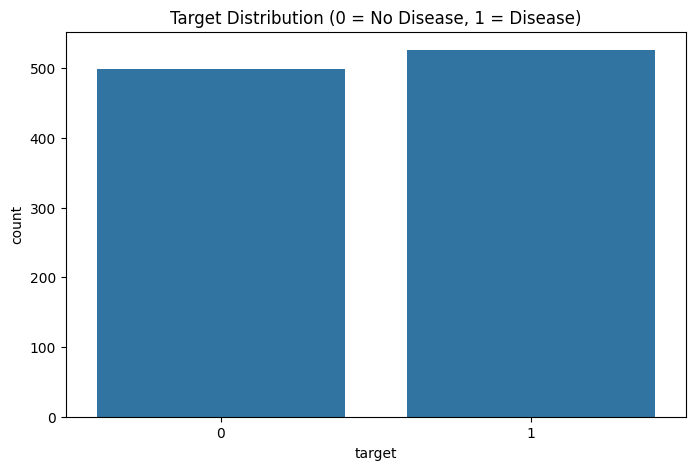

In [12]:
# Encode Categorical Columns (Assuming 'sex', 'cp', 'thal', etc. are strings)
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"Categorical Columns: {categorical_cols.tolist()}")

# Apply Label Encoding to all object columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Confirm Encoding Worked
print(df.head())

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(8,5))
sns.countplot(x='target', data=df)
plt.title('Target Distribution (0 = No Disease, 1 = Disease)')
plt.show()

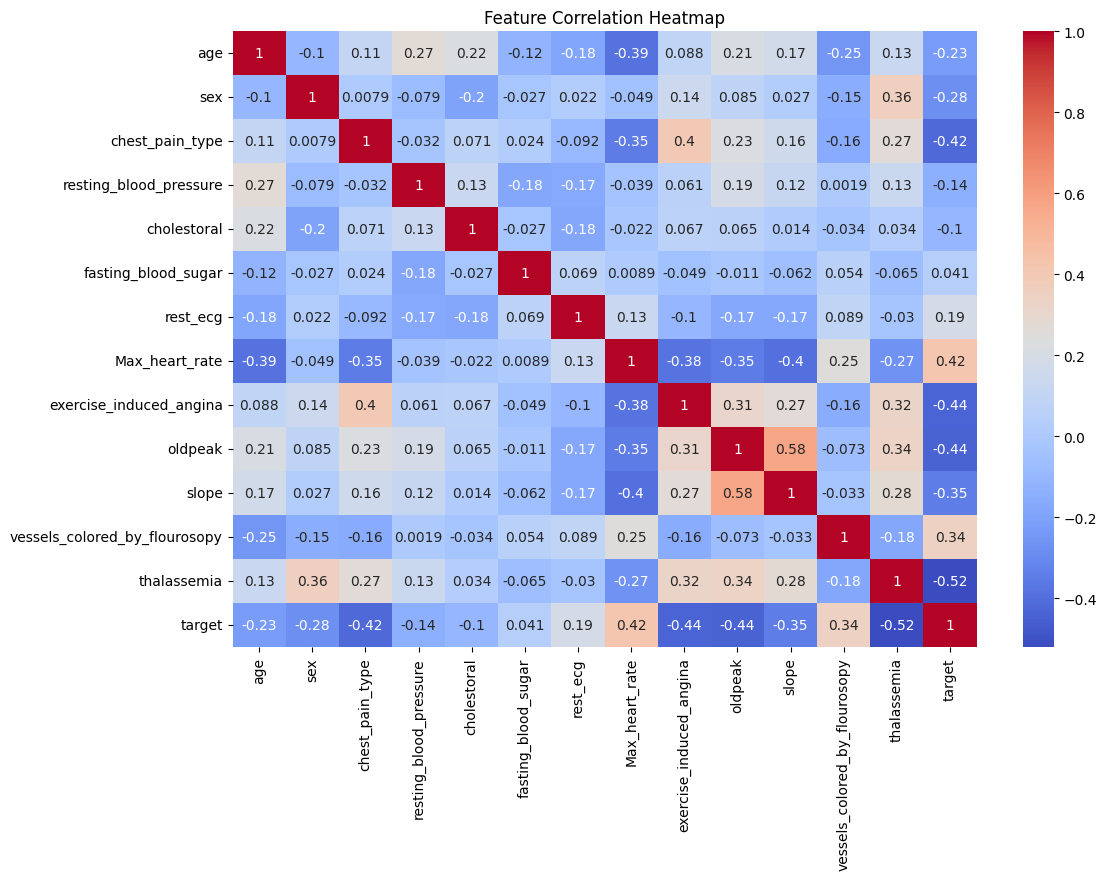

In [13]:
# Correlation Matrix (Numeric Columns Only)
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [14]:
# Split Features and Target
X = df.drop('target', axis=1)
y = df['target']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model Training (Logistic Regression)
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.80


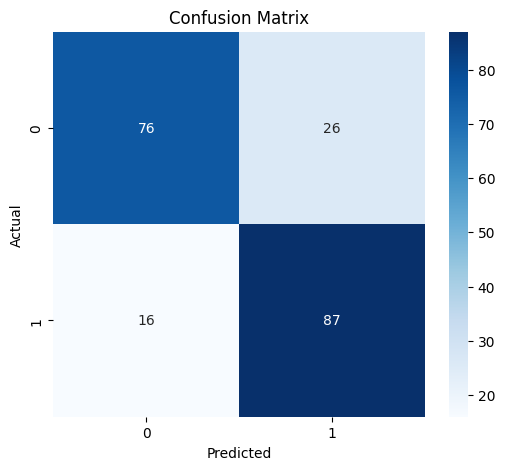

In [15]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

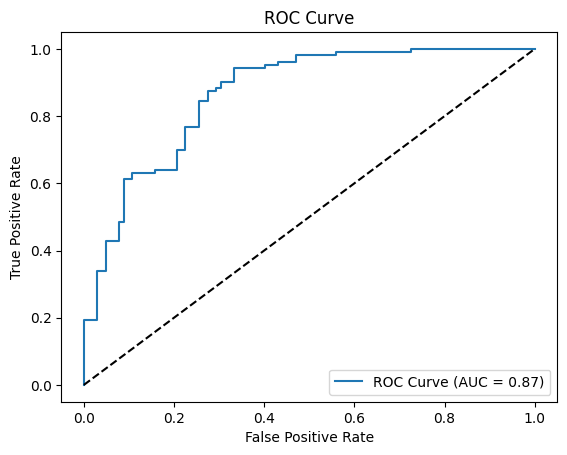

In [16]:
# ROC Curve & AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [17]:
# Feature Importance (Logistic Regression Coefficients)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': abs(model.coef_[0])
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
                          Feature  Importance
9                         oldpeak    0.764107
12                    thalassemia    0.716186
2                 chest_pain_type    0.708875
11  vessels_colored_by_flourosopy    0.695004
1                             sex    0.609420
4                     cholestoral    0.475822
7                  Max_heart_rate    0.465554
8         exercise_induced_angina    0.374423
3          resting_blood_pressure    0.278998
10                          slope    0.212544
6                        rest_ecg    0.147971
5             fasting_blood_sugar    0.058886
0                             age    0.023564


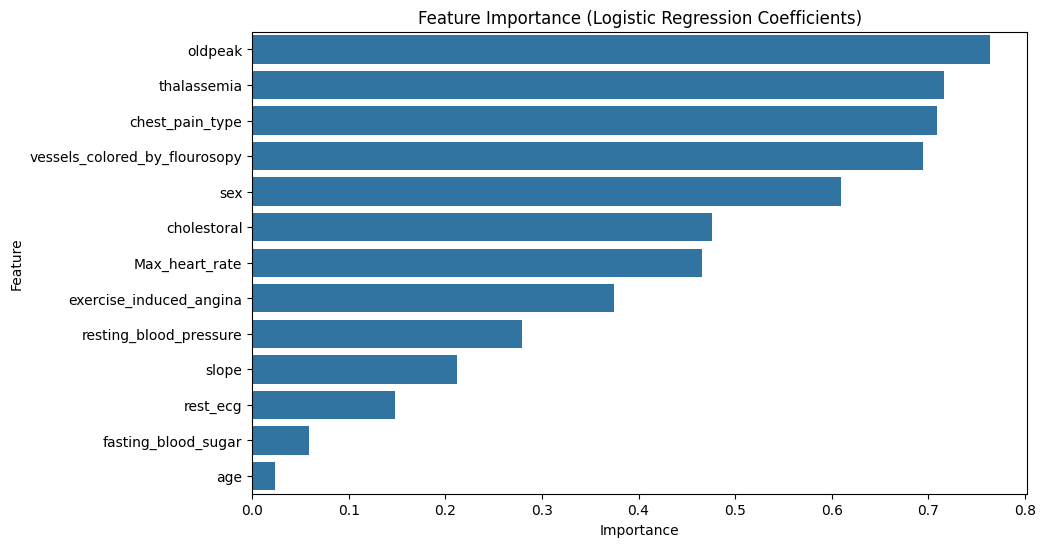

In [18]:
# Bar Plot of Feature Importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.show()